<a href="https://colab.research.google.com/github/DonghaeSuh/PyTorch_Basic/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [8]:
cd drive/MyDrive/pytorch

/content/drive/MyDrive/pytorch


### 라이브러리 불러오기

In [14]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

### Dataset Class

In [15]:
class CustomDataset(Dataset):
  def __init__(self,path):
    df=pd.read_csv(path)
    self.x1=df.iloc[:,0].values
    self.x2=df.iloc[:,1].values
    self.x3=df.iloc[:,2].values
    self.y=df.iloc[:,3].values
    self.length=len(df)

  def __getitem__(self,index):
    x=torch.FloatTensor([self.x1[index],self.x2[index],self.x3[index]])
    y=torch.FloatTensor([self.y[index]])
    return x,y

  def __len__(self):
    return self.length

### Model Class

In [22]:
class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel,self).__init__()
    self.layer=nn.Sequential(
        nn.Linear(3,1),
        nn.Sigmoid()
    )

  def forward(self,x):
    x=self.layer(x)
    return x

### dataset Load

In [23]:
train_dataset = CustomDataset("./dataset.csv")
train_dataloader=DataLoader(train_dataset,batch_size=128,shuffle=True,drop_last=True)

### Compile

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model=CustomModel().to(device)
criterion=nn.BCELoss().to(device)
optimizer=optim.SGD(model.parameters(),lr=0.0001)

### Training

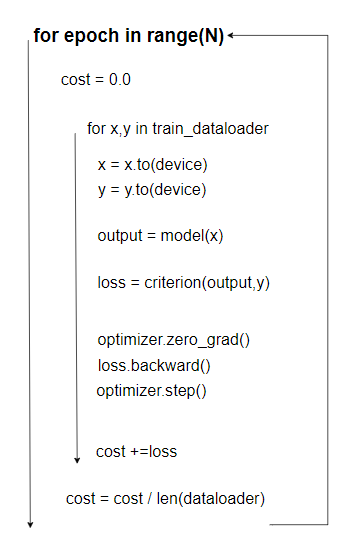

In [25]:
for epoch in range(10000):
  cost=0.0

  for x,y in train_dataloader:
    
    x=x.to(device)
    y=y.to(device)

    output = model(x)

    loss = criterion(output,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost+=loss

  cost = cost/len(train_dataloader)

  if (epoch+1)%1000 == 0 :
    print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost: {cost:.3f}")

<ipython-input-15-881aa88e421c>:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y=torch.FloatTensor([self.y[index]])


Epoch : 1000, Model : [Parameter containing:
tensor([[0.0052, 0.0023, 0.0043]], requires_grad=True), Parameter containing:
tensor([-0.2935], requires_grad=True)], Cost: 0.639
Epoch : 2000, Model : [Parameter containing:
tensor([[0.0057, 0.0027, 0.0048]], requires_grad=True), Parameter containing:
tensor([-0.3643], requires_grad=True)], Cost: 0.630
Epoch : 3000, Model : [Parameter containing:
tensor([[0.0060, 0.0028, 0.0053]], requires_grad=True), Parameter containing:
tensor([-0.4342], requires_grad=True)], Cost: 0.622
Epoch : 4000, Model : [Parameter containing:
tensor([[0.0062, 0.0039, 0.0055]], requires_grad=True), Parameter containing:
tensor([-0.5031], requires_grad=True)], Cost: 0.618
Epoch : 5000, Model : [Parameter containing:
tensor([[0.0064, 0.0038, 0.0057]], requires_grad=True), Parameter containing:
tensor([-0.5710], requires_grad=True)], Cost: 0.610
Epoch : 6000, Model : [Parameter containing:
tensor([[0.0076, 0.0043, 0.0061]], requires_grad=True), Parameter containing:
te

### TEST

In [26]:
with torch.no_grad():
  model.eval()

  input= torch.FloatTensor(
      [[89, 92, 75], [75, 64, 50], [38, 58, 63], [33, 42, 39], [23, 15, 32]]
  ).to(device)

  outputs=model(input)

  print("----------")
  print(outputs)
  print(outputs>= torch.FloatTensor([0.5]).to(device))

----------
tensor([[0.7252],
        [0.6209],
        [0.5624],
        [0.4823],
        [0.4079]])
tensor([[ True],
        [ True],
        [ True],
        [False],
        [False]])
